In [1]:
%pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("mieszkania.csv")
df.head()

,metraz_m2,cena_tys
0,35,310
1,42,355
2,50,395
3,57,430
4,65,470


Współczynnik (a): 5.435187608739161
Wyraz wolny (b): 122.55816101864565
Przewidywana cena dla 40 m²: 340.0 tys. zł
Przewidywana cena dla 60 m²: 448.7 tys. zł
Przewidywana cena dla 80 m²: 557.4 tys. zł
Przewidywana cena dla 100 m²: 666.1 tys. zł


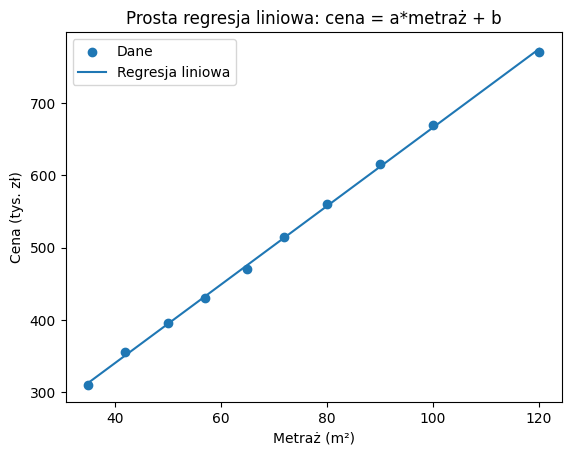

In [5]:
X = df[["metraz_m2"]].values
y = df["cena_tys"].values

model = LinearRegression()
model.fit(X, y)

print("Współczynnik (a):", model.coef_[0])
print("Wyraz wolny (b):", model.intercept_)

# Predykcja dla kilku przykładowych metraży
sample = np.array([[40],[60],[80],[100]])
pred = model.predict(sample)
for m2, p in zip(sample.flatten(), pred):
    print(f"Przewidywana cena dla {m2} m²: {p:.1f} tys. zł")

# Wykres: punkty + linia regresji
plt.figure()
plt.scatter(X, y, label="Dane")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Regresja liniowa")
plt.xlabel("Metraż (m²)")
plt.ylabel("Cena (tys. zł)")
plt.title("Prosta regresja liniowa: cena = a*metraż + b")
plt.legend()
plt.show()

Statystyki ceny za m2:
count      10.000000
mean     7408.693047
std       783.760474
min      6416.666667
25%      6875.000000
50%      7191.773504
75%      7810.964912
max      8857.142857
Name: cena_za_m2, dtype: float64


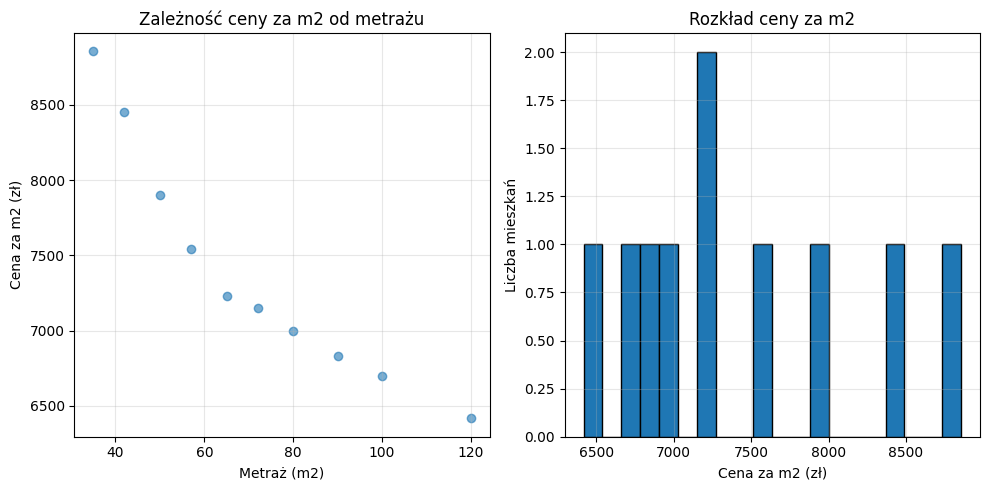


Przykładowe wartości:
   metraz_m2  cena_tys   cena_za_m2
0         35       310  8857.142857
1         42       355  8452.380952
2         50       395  7900.000000
3         57       430  7543.859649
4         65       470  7230.769231
5         72       515  7152.777778
6         80       560  7000.000000
7         90       615  6833.333333
8        100       670  6700.000000
9        120       770  6416.666667


In [7]:
# Zadanie 1

df["cena_za_m2"] = df["cena_tys"] * 1000 / df["metraz_m2"]

print("Statystyki ceny za m2:")
print(df["cena_za_m2"].describe())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df["metraz_m2"], df["cena_za_m2"], alpha=0.6)
plt.xlabel("Metraż (m2)")
plt.ylabel("Cena za m2 (zł)")
plt.title("Zależność ceny za m2 od metrażu")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df["cena_za_m2"], bins=20, edgecolor='black')
plt.xlabel("Cena za m2 (zł)")
plt.ylabel("Liczba mieszkań")
plt.title("Rozkład ceny za m2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPrzykładowe wartości:")
print(df[["metraz_m2", "cena_tys", "cena_za_m2"]].head(10))

Model liniowy:
	MSE: 12.24
	R^2: 0.9994

Model z nieliniowością (metraż^2):
	MSE: 11.03
	R^2: 0.9994
	Współczynniki: a1=5.6896, a2=-0.001672
	Wyraz wolny: b=114.01

Zmniejszenie MSE: 1.22 (9.93%)


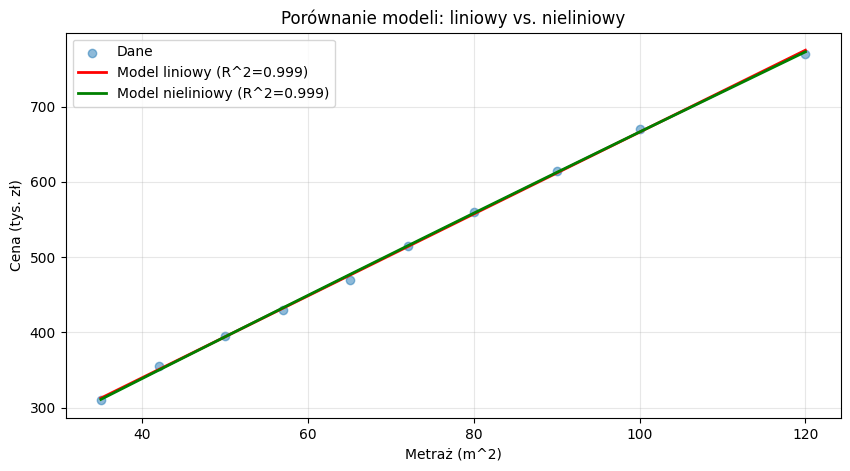

In [13]:
# Zadanie 2
from sklearn.metrics import mean_squared_error, r2_score

X_linear = df[["metraz_m2"]].values
y = df["cena_tys"].values

model_linear = LinearRegression()
model_linear.fit(X_linear, y)
y_pred_linear = model_linear.predict(X_linear)

X_poly = df[["metraz_m2"]].copy()
X_poly["metraz_m2_kwadrat"] = X_poly["metraz_m2"] ** 2

model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)

mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print("Model liniowy:")
print(f"\tMSE: {mse_linear:.2f}")
print(f"\tR^2: {r2_linear:.4f}")

print("\nModel z nieliniowością (metraż^2):")
print(f"\tMSE: {mse_poly:.2f}")
print(f"\tR^2: {r2_poly:.4f}")
print(f"\tWspółczynniki: a1={model_poly.coef_[0]:.4f}, a2={model_poly.coef_[1]:.6f}")
print(f"\tWyraz wolny: b={model_poly.intercept_:.2f}")

print(f"\nZmniejszenie MSE: {mse_linear - mse_poly:.2f} ({((mse_linear - mse_poly)/mse_linear)*100:.2f}%)")

plt.figure(figsize=(10, 5))
plt.scatter(X_linear, y, alpha=0.5, label="Dane")

x_sorted = np.sort(X_linear.flatten())
plt.plot(x_sorted, model_linear.predict(x_sorted.reshape(-1, 1)), 
         'r-', label=f"Model liniowy (R^2={r2_linear:.3f})", linewidth=2)

X_poly_sorted = pd.DataFrame({
    "metraz_m2": x_sorted,
    "metraz_m2_kwadrat": x_sorted ** 2
})
plt.plot(x_sorted, model_poly.predict(X_poly_sorted), 
         'g-', label=f"Model nieliniowy (R^2={r2_poly:.3f})", linewidth=2)

plt.xlabel("Metraż (m^2)")
plt.ylabel("Cena (tys. zł)")
plt.title("Porównanie modeli: liniowy vs. nieliniowy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

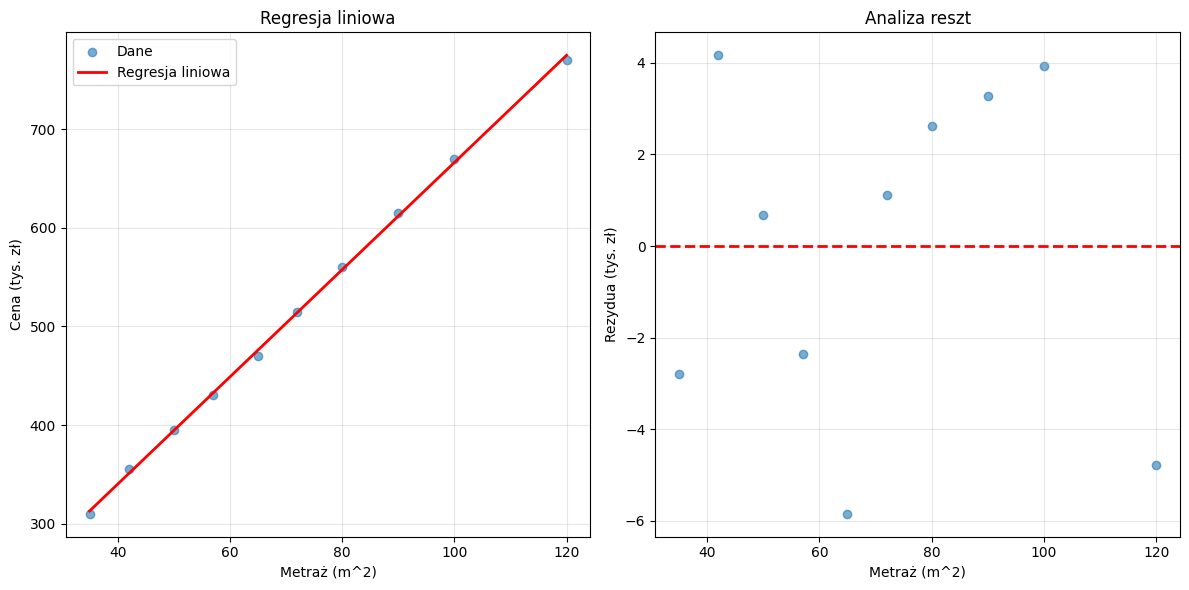

In [14]:
# Zadanie 3
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.6, label="Dane")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, 'r-', label="Regresja liniowa", linewidth=2)
plt.xlabel("Metraż (m^2)")
plt.ylabel("Cena (tys. zł)")
plt.title("Regresja liniowa")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y - model.predict(X)
plt.scatter(X, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Metraż (m^2)")
plt.ylabel("Rezydua (tys. zł)")
plt.title("Analiza reszt")
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.savefig("regresja.png", dpi=300, bbox_inches='tight')
plt.show()